# Phys 574 - Assignment 3 - Alejandro Salazar Lobos - ID: 1517982

1. Monte-Carlo Simulation of Polynomial Fit

For this problem, assume the model is the following:

$y_{model}(x) = 1 + 0.1234x + 0.5678x^2$,

and Gaussian errors in $y$. Assume that the values of $x$ are drawn from a uniform distribution between 0 and 20. Assume that each datum's error $\sigma_i$ is drawn from a Gaussian with $\mu = 5$ and $\sigma = 0.5$ (ensure that no simulated error is less than or equal to 0).

In [1]:
import numpy as np
from scipy.integrate import quad # for integration.
import math
import matplotlib.pyplot as plt

In [2]:
# Prototype for the solutions of this question.

# x values.
x = np.random.uniform(0, 20, 100)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 100)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

1a)

In [3]:
# Model function.

params = [1, 0.1234, 0.5678]    # Model parameters.

def ymodel(x_i, sigma_i, params):
    # Model.
    ymodel_i = params[0] + params[1]*x_i + params[2]*x_i**2
    
    # Simulation.
    ysim_i = []
    for i in range(0, len(ymodel_i)):
        ysim_i.append(np.random.normal(ymodel_i[i], sigma_i[i]))
    return [ymodel_i, ysim_i]

1b)

In [4]:
# Chi-square test function.

def chi2test(obsvals, expvals):
    # obsvals = ysim_i
    # expvals = ymodel_i

    # Calculation of the reduced chi-square.
    chi2 = 0
    for i in range(len(obsvals)):
        chi2_i = (expvals[i] - obsvals[i])**2 / sigma_i[i]**2
        chi2 = chi2 + chi2_i

    nparams = 3    # three parameters in ymodel.
    ndata = len(x_i)    # number of data to fit.
    nu = ndata - nparams    # nu = degrees of freedom.
    chi2reduced = chi2/nu    # reduced chi-square.


    # Define the chi-squared density function.
    def chi2func(chi2dumm):
        nu = ndata - nparams
        return (chi2dumm)**(nu/2 - 1) * np.exp(-chi2dumm / 2) / (2**(nu/2) * math.gamma(nu/2))

    # Integrate the chi-squared density function.
    chi2P = quad(chi2func, chi2, np.Infinity)
    
    return chi2, chi2reduced, chi2P

1c)

1c) (i)

In [5]:
# We use 8 data points.
# x values.
x_i = np.random.uniform(0, 20, 8)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 8)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

In [6]:
chi2vals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2 = chi2test(ysim_i, ymodel_i)[0]
    chi2vals.append(chi2)

1c) (ii) Using the 1000 simulations, calculate the median and $1\sigma$ confidence interval of the 1000 values of $\chi^2$

In [7]:
# Median.
center = np.median(chi2vals)
print(center)

7.242241172126613


Determine which confidence interval method is better for this case. Make a scatter plot of the $\chi^2$ values

Text(0,0.5,'chi2 value number')

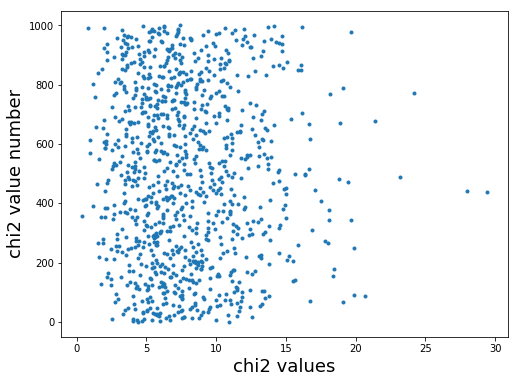

In [8]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(chi2vals, np.linspace(0, len(chi2vals), len(chi2vals)), '.')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('chi2 value number', fontsize= 18)

Text(0,0.5,'Frequency')

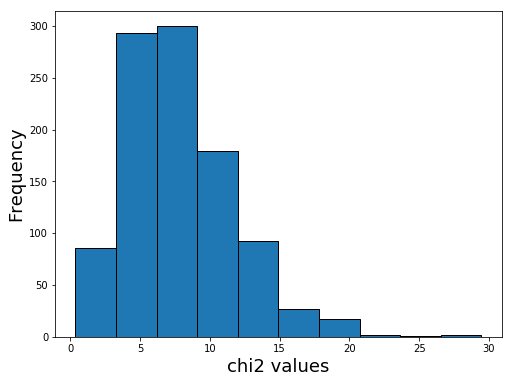

In [9]:
# Create histogram.
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.hist(chi2vals, bins = 10, edgecolor = 'k')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

1d)

1d) (i)

In [10]:
# We use 13 data points.
# x values.
x_i = np.random.uniform(0, 20, 13)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 13)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

In [11]:
chi2vals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2 = chi2test(ysim_i, ymodel_i)[0]
    chi2vals.append(chi2)

1d) (ii)

In [12]:
# Median.
center = np.median(chi2vals)
print(center)

12.554632074860834


Determine which confidence interval method is better for this case. Make a scatter plot of the $\chi^2$ values

Text(0,0.5,'chi2 value number')

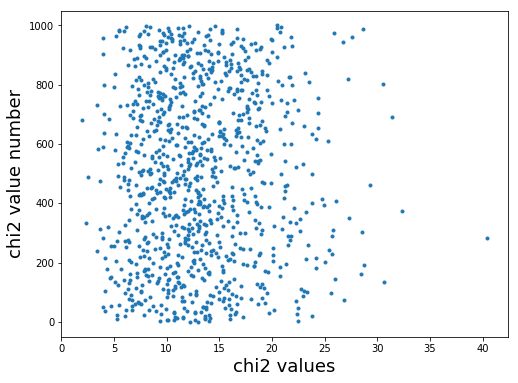

In [13]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(chi2vals, np.linspace(0, len(chi2vals), len(chi2vals)), '.')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('chi2 value number', fontsize= 18)

Text(0,0.5,'Frequency')

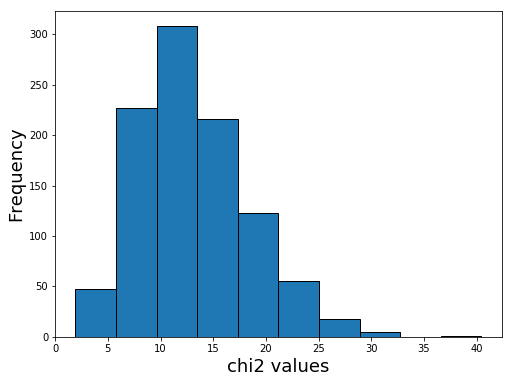

In [14]:
# Create histogram.
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.hist(chi2vals, bins = 10, edgecolor = 'k')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

1e)

1e) (i)

In [15]:
# We use 103 data points.
# x values.
x_i = np.random.uniform(0, 20, 103)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 103)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

In [16]:
chi2vals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2 = chi2test(ysim_i, ymodel_i)[0]
    chi2vals.append(chi2)

1e) (ii)

In [17]:
# Median.
center = np.median(chi2vals)
print(center)

102.31192600693544


Determine which confidence interval method is better for this case. Make a scatter plot of the $\chi^2$ values

Text(0,0.5,'chi2 value number')

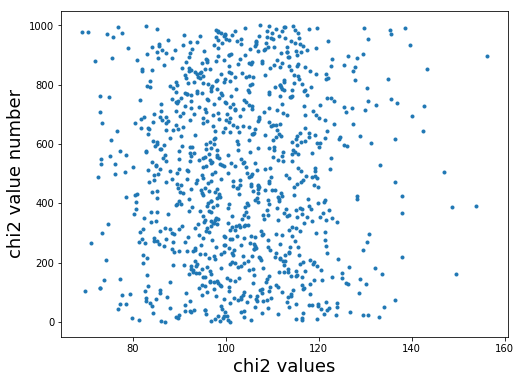

In [18]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(chi2vals, np.linspace(0, len(chi2vals), len(chi2vals)), '.')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('chi2 value number', fontsize = 18)

Text(0,0.5,'Frequency')

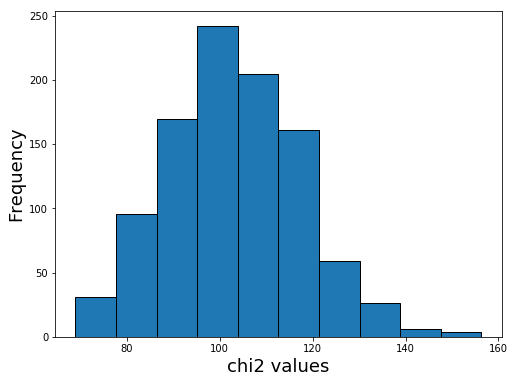

In [19]:
# Create histogram.
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.hist(chi2vals, bins = 10, edgecolor = 'k')
plt.xlabel('chi2 values', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)

1f)

1f) (i)

In [20]:
# We use 1003 data points.
# x values.
x_i = np.random.uniform(0, 20, 1003)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 1003)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

In [21]:
chi2vals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    #chi2 = chi2test(ysim_i, ymodel_i)[0]
    #chi2vals.append(chi2)

1g) For each of the median values of 1c to 1f, calculate the probability that the $\chi^2$ could be above the measured median $\chi^2$

For 1c):

In [22]:
# x values.
x_i = np.random.uniform(0, 20, 8)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 8)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

chi2Pvals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2P = chi2test(ysim_i, ymodel_i)[2][0]
    chi2Pvals.append(chi2P)
    
# Median.
centerc = np.median(chi2Pvals)
print("Chi-square probability:", centerc)

Chi-square probability: 0.2008302783420407


For 1d):

In [23]:
# x values.
x_i = np.random.uniform(0, 20, 13)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 13)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

chi2Pvals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2P = chi2test(ysim_i, ymodel_i)[2][0]
    chi2Pvals.append(chi2P)
    
# Median.
centerd = np.median(chi2Pvals)
print("Chi-square probability:", centerd)

Chi-square probability: 0.26240723487206374


For 1e):

In [24]:
# x values.
x_i = np.random.uniform(0, 20, 103)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 103)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

chi2Pvals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    chi2P = chi2test(ysim_i, ymodel_i)[2][0]
    chi2Pvals.append(chi2P)
    
# Median.
centere = np.median(chi2Pvals)
print("Chi-square probability:", centere)

Chi-square probability: 0.4147583390700669


For 1f)

In [25]:
# x values.
x_i = np.random.uniform(0, 20, 1003)
# Data error sigma_i.
mu = 5;
sigma = 0.5;
sigma_i = np.random.normal(mu, sigma, 1003)

# Ensure that NO sigma_i is less than or equal to zero.

for i in range(0, len(sigma_i)):
    if sigma_i[i] <= 0:
        substitute = np.random.normal(mu, sigma, 10) # The standard deviation
                                                     # is not big enough to really
                                                     # worrying about getting
                                                     # ten zeroes at once.
        for j in substitute:
            if j > 0:
                sigma_i[i] = j
                break

chi2Pvals = []

MonteCarloIterations = 10**3

for i in range(0, MonteCarloIterations):
    [ymodel_i, ysim_i] = ymodel(x_i, sigma_i, params)
    #chi2P = chi2test(ysim_i, ymodel_i)[2][0]
    #chi2Pvals.append(chi2P)
    
# Median.
#centerf = np.median(chi2Pvals)
#print("Chi-square probability:", centerf)

The following plot summarizes the results of the chi-square probability integration, and compares them to the desirable value of 0.5:

Text(0,0.5,'$P = \\int_{\\chi_{min}^2}^{\\infty} \\rho(\\chi^2)$')

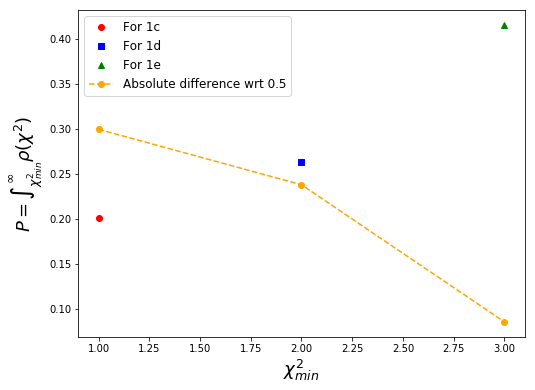

In [26]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(1, centerc, 'ro', label = 'For 1c')
plt.plot(2, centerd, 'bs', label = 'For 1d')
plt.plot(3, centere, 'g^', label = 'For 1e')
plt.plot([1, 2, 3], [abs(centerc - 0.5), abs(centerd - 0.5), abs(centere - 0.5)], 'o--', color = 'orange', label = 'Absolute difference wrt 0.5')
plt.legend(fontsize = 12, loc = 'best')
plt.xlabel(r'$\chi_{min}^2$', fontsize = 18)
plt.ylabel(r'$P = \int_{\chi_{min}^2}^{\infty} \rho(\chi^2)$', fontsize = 18)

In the figure immediately above, $\rho(\chi^2)$ is the "chi-square density" (see the definition of the density function in the code above)

2. Fitting a line - 1-D errors and Linear-Least-Squares

2a)

In [27]:
# Data from Table 1 in Hogg, Bovy, & lang (2010), excluding IDs 2-4.

ID = [1] + list(np.linspace(5, 20, 16))
xa = [201, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146]
ya = [592, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344]
sigmaya = [61, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]

# I will first do the problem using the function polyfit; this because of time
# constraints. If I still have time after I go through all the problems and final
# project, I will build my own function/library to perform the fit using the
# matrix approach shown in Hogg, Bovy, & Lang (2010). The results of the matrix
# approach should give the same results as the weighted fit formulas provided
# in Taylors' Error analysis book.

[args, cov] = np.polyfit(xa, ya, 1, rcond = None, full = False, w = np.divide(1,sigmaya), cov = True)
slopea = args[0]; intercepta = args[1];

# Get the uncertainties in the slope and intercept from the covariance matrix.
uncertainties = np.sqrt(np.diag(cov))
slopeaunc = uncertainties[0]; interceptaunc = uncertainties[1];

xafit = list(np.linspace(min(xa)-10, max(xa)+10, 100))
yafit = intercepta + list(np.multiply(slopea, xafit))

print("slope, slope_unc =", slopea, slopeaunc)
print("intercept, intercept_unc =", intercepta, interceptaunc)

slope, slope_unc = 2.252669605782331 0.13914043169693338
intercept, intercept_unc = 32.70598243587567 23.58800842027356


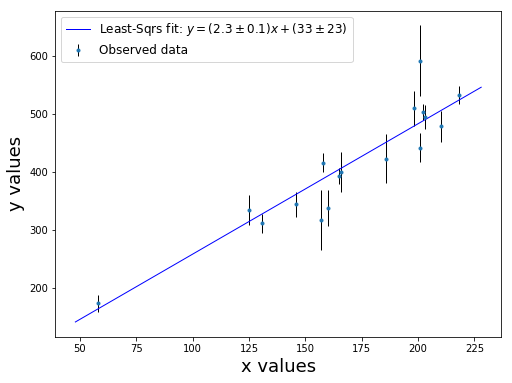

In [28]:
# Take a look at the plot.
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.plot(xafit, yafit, '-', linewidth = 1, color = 'blue', label = "Least-Sqrs fit: " + r"$y = (2.3 \pm 0.1)x + (33 \pm 23)$")
plt.errorbar(xa, ya, yerr = sigmaya, xerr = None, fmt = '.', ecolor = 'black', linewidth = 1, label = 'Observed data')
plt.xlabel('x values', fontsize = 18)
plt.ylabel('y values', fontsize = 18)
plt.legend(fontsize = 12, loc = 'upper left')

In [29]:
# Now calculate the reduced chi-square and the chi-square (probability distribution).

# Computation of the reduced chi-square.

S = 0

# Re-define the yafit values with the correct length for the following computations.
yafit = intercepta + list(np.multiply(slopea, xa))

for i in range(0, len(ya)):
    Si = (ya[i] - yafit[i])**2 / sigmaya[i]**2
    S = S + Si

nparams = 3    # three parameters in ymodel.
ndata = len(x_i)    # number of data to fit.
nu = ndata - nparams    # nu = degrees of freedom.
X = S/nu    # reduced chi-square.

# Now calculate the chi-square distribution.

# Define the chi-squared density function.
def chi2func(Sdumm):
    nu = ndata - nparams
    return (Sdumm)**(nu/2 - 1) * np.exp(-Sdumm / 2) / (2**(nu/2) * math.gamma(nu/2))

# Integrate the chi-squared density function.
#chi2 = quad(chi2func, S, np.Infinity)

# Print the results.
print("Chi-square", S)
print("Reduced chi-square:", X)
print()
#print("Chi-square density distribution, unc:", chi2)

Chi-square 21.764309762731767
Reduced chi-square: 0.021764309762731766



2b)

In [30]:
# Data from Table 1 in Hogg, Bovy, & lang (2010), complete.

ID = list(np.linspace(1, 20, 20))
xb = [201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146]
yb = [592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344]
sigmayb = [61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]

# As in part 2a), I will first do the problem using the function polyfit; this because of time
# constraints. If I still have time after I go through all the problems and final
# project, I will build my own function/library to perform the fit using the
# matrix approach shown in Hogg, Bovy, & Lang (2010). The results of the matrix
# approach should give the same results as the weighted fit formulas provided
# in Taylors' Error analysis book.

[args, cov] = np.polyfit(xb, yb, 1, rcond = None, full = False, w = np.divide(1, sigmayb), cov = True)
slopeb = args[0]; interceptb = args[1];

# Get the uncertainties in the slope and intercept from the covariance matrix.
uncertainties = np.sqrt(np.diag(cov))
slopebunc = uncertainties[0]; interceptbunc = uncertainties[1];

xbfit = list(np.linspace(min(xb)-10, max(xb)+10, 100))
ybfit = interceptb + list(np.multiply(slopeb, xbfit))

print("slope, slope_unc =", slopeb, slopebunc)
print("intercept, intercept_unc =", interceptb, interceptbunc)

slope, slope_unc = 1.0767475241683275 0.32952689163973375
intercept, intercept_unc = 213.27349197596067 61.276554766597386


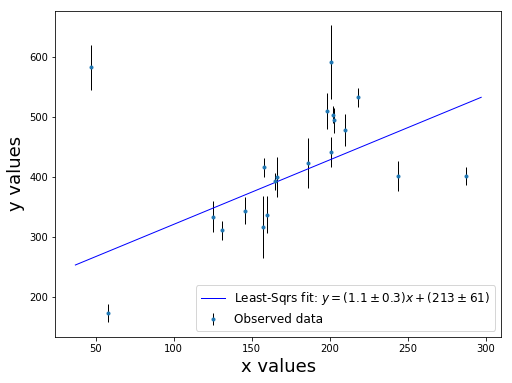

In [31]:
# Take a look at the plot.
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6)
plt.plot(xbfit, ybfit, '-', linewidth = 1, color = 'blue', label = "Least-Sqrs fit: " + r"$y = (1.1 \pm 0.3)x + (213 \pm 61)$")
plt.errorbar(xb, yb, yerr = sigmayb, xerr = None, fmt = '.', ecolor = 'black', linewidth = 1, label = 'Observed data')
plt.xlabel('x values', fontsize = 18)
plt.ylabel('y values', fontsize = 18)
plt.legend(fontsize = 12, loc = 'lower right')

3. Fitting a line - 1-D errors and MCMC

For this question, I will follow the second part of the document "02_OLS via MCMC.ipynb", that finds the parameters of the linear fit, provided in class

From the Hogg et al. article: the reason why OLS works is that the problem can be expressed in terms of a linear optimization problem (the maximization of the probability function  

$$\mathcal{L_i} \equiv p(y_i|\, x_i,\sigma_i,m,b) $$

$$\mathcal{L} = \prod_{i=1}^n L_i $$
$$\ln \mathcal{L} = \ln \left [ \prod_{i=1}^n \left( \frac{1}{\sqrt{2\pi \sigma^2_i}}\exp\left[-\frac{(y_i - mx_i-b)^2}{2\sigma_i^2}\right] \right) \right] $$

$$\ln \mathcal{L} = \ln \left( \prod_{i=1}^n  \left[ \left( 2\pi \sigma^2_i\right)^{-1/2} \right] \right)  +  \ln \left( \prod_{i=1}^n  \exp\left[-\frac{(y_i - mx_i-b)^2}{2\sigma_i^2}\right] \right) $$

$$\ln \mathcal{L} = -0.5 \sum_{i=1}^n \ln \left( 2\pi \sigma^2_i \right) - \sum_{i=1}^n \frac{(y_i - mx_i-b)^2}{2\sigma_i^2} (*)$$

We define the log of this function, Equation $(*)$ in terms of a vector of parameters $"p"$ and the given data. We will include the pre-factor (this does not affect the minimization)

3a)

In [32]:
# Install emcee.
!python -m pip install --upgrade pip
!pip install msgpack
!pip install emcee==2.2.1

# Import
import emcee # Goodman & Weare's Affine Invariant Markov chain Monte Carlo Ensemble sampler.

In [33]:
def logProbFunc(p, x, y, yerr): # returns the (natural) logarithmic probability.
    p = np.array(p); x = np.array(x); y = np.array(y); yerr = np.array(yerr); # can't do ** operation on lists.
    b, m = p[0], p[1] # unpack from parameter vector.
    logProb = - 0.5 * np.nansum(np.log(2 * np.pi * yerr**2)) - np.nansum((y - m * x - b)**2 / (2 * yerr**2))
    return logProb

Best slope for b = 32.71: 2.26


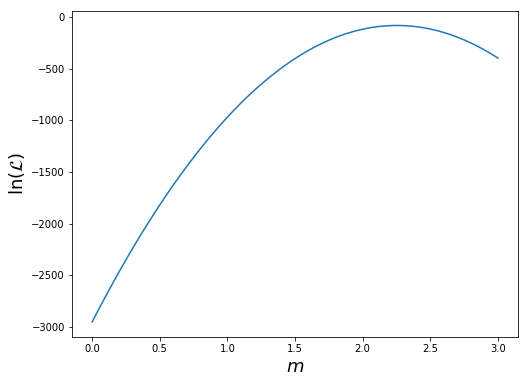

In [34]:
# Plot the sample of the logarithmic probability space at zero intercept but varying slopes.
# We take into account the intercept b from above.

logProbSample = np.array([logProbFunc([intercepta, trialm], xa, ya, sigmaya) for trialm in np.linspace(0, 3, 300)])
m_plot = np.linspace(0, 3, 300)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.plot(m_plot, logProbSample)
plt.xlabel(r'$m$', fontsize = 18)
plt.ylabel(r'$\ln(\mathcal{L})$', fontsize = 18)

# Print result.
print('Best slope for b = {1:4.2f}: {0:4.2f}'.format(m_plot[np.argmax(logProbSample)], intercepta))

We now sample our logarithmic probability distribution with emcee. The code below has been taken from "02_OLS via MCMC.ipynb" and it represents a typical call signature to emcee.

In [35]:
ndim, nwalkers = 2, 10
# We want one dimension parameter.
# nwalkers is the number of independent samplers.
# Each walker's steps are called a chain.
p0 = np.zeros((nwalkers, ndim))    # sampler initial condition.
p0[:, 0] = np.random.randn(nwalkers)*500
p0[:, 1] = (np.random.randn(nwalkers))*10

# Initialize a sampler object.
sampler = emcee.EnsembleSampler(nwalkers, ndim, logProbFunc, args = [xa, ya, sigmaya])
# Walk through MCMC for 500 step 'burn-in' (optimization).
[pos, prob, state] = sampler.run_mcmc(p0, 500)

Now we look at some of the sample chains. I will try different chains with the order of elements sampler.chain[chain, step, paremeter]

Text(0,0.5,'Chain 2 for $m$')

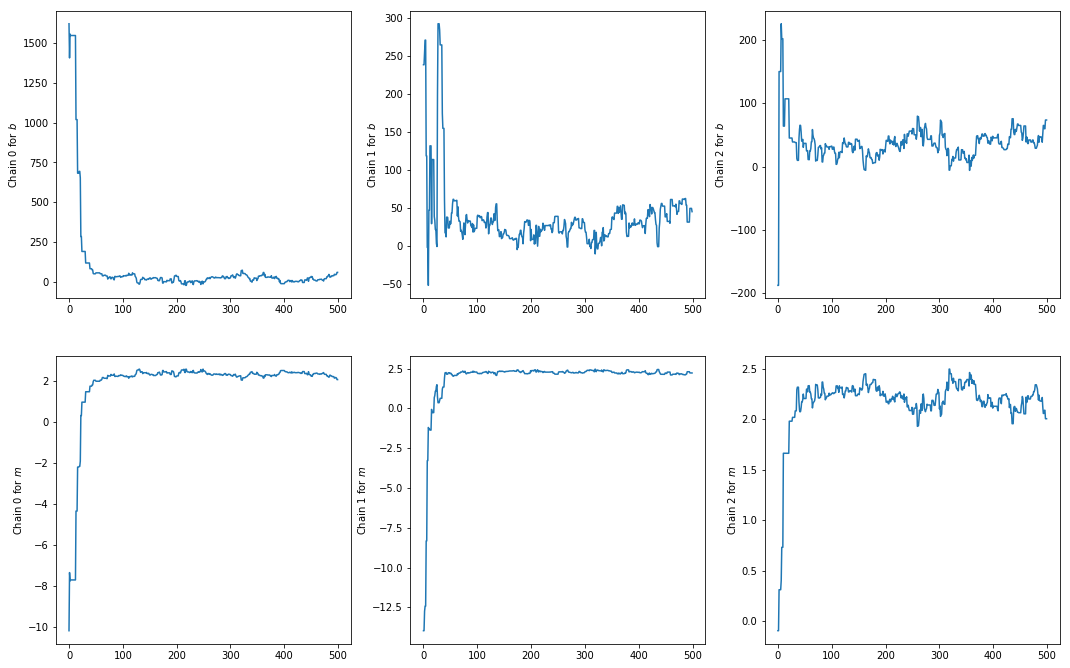

In [36]:
fig = plt.figure(figsize = (18, 18))    # begin figure.

plt.subplot(3, 3, 1)
plt.plot(sampler.chain[0, :, 0])
plt.ylabel(r'Chain 0 for $b$')

plt.subplot(3, 3, 2)
plt.plot(sampler.chain[1, :, 0])
plt.ylabel(r'Chain 1 for $b$')

plt.subplot(3, 3, 3)
plt.plot(sampler.chain[2, :, 0])
plt.ylabel(r'Chain 2 for $b$')

plt.subplot(3, 3, 4)
plt.plot(sampler.chain[0, :, 1])
plt.ylabel(r'Chain 0 for $m$')

plt.subplot(3, 3, 5)
plt.plot(sampler.chain[1, :, 1])
plt.ylabel(r'Chain 1 for $m$')

plt.subplot(3, 3, 6)
plt.plot(sampler.chain[2, :, 1])
plt.ylabel(r'Chain 2 for $m$')

In [37]:
# We look at all the walker chains and variables at once (just for fun).
def plot_chains(sampler, ndim, labels):
    [fig, axes] = plt.subplots(ndim, figsize = (10, 7), sharex = True)
    samples = sampler.chain
    num_steps = samples[0, :, 0].size
    
    for i in range(ndim):
        ax = axes[i]
        median_var = np.median(samples[:, :, i])
        
        for j in range(nwalkers):
            ax.plot(samples[j, :, i] - median_var, "k", alpha = 0.3)
            
        ax.set_xlim(0, num_steps)
        ax.set_ylabel("{0}-{1:4.2e}".format(labels[i], median_var))
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_yscale('symlog',
                     linthreshy = np.percentile(np.abs(samples[:, :, i]), 25))
    axes[-1].set_xlabel("step number")
    
    [fig, axes] = plt.subplots(ndim, figsize = (10, 7))
    
    for i in range(ndim):
        ax = axes[i]
        ax.hist(sampler.flatchain[:, i], bins = 100)
        ax.set_xlabel("Distribution of {0}".format(labels[i]))

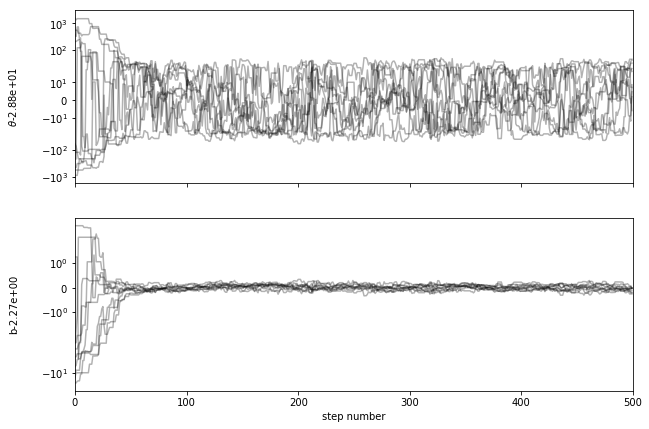

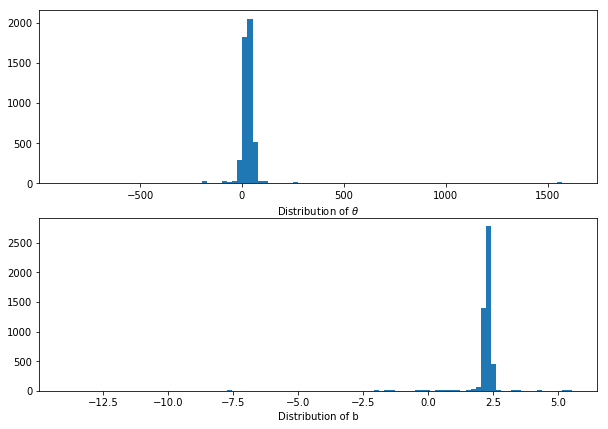

In [38]:
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

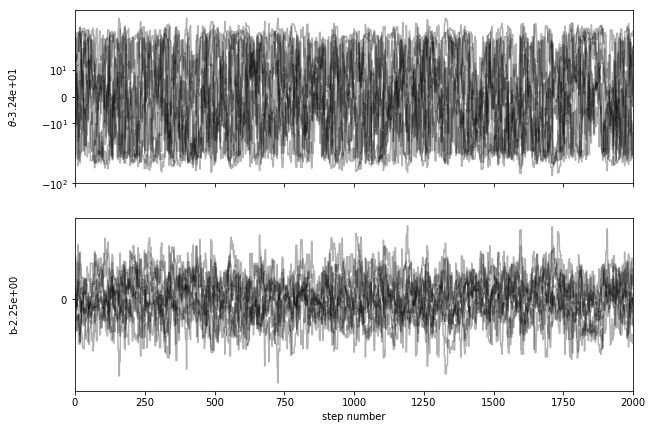

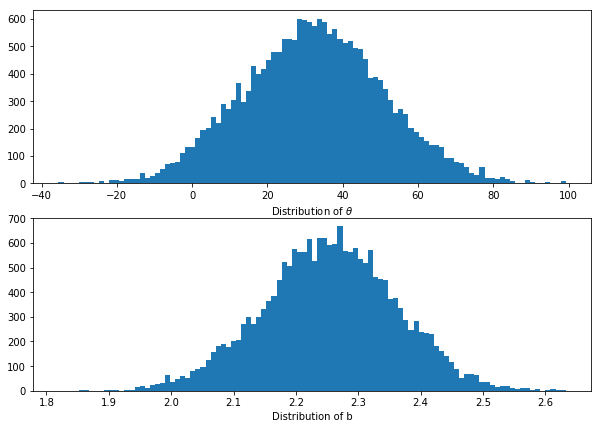

In [39]:
# This line restarts the MCMC process after burn-in leaving only the part we care about.
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 2000)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

According to the lecture notes, there is some autocorrelation between nearby steps of a given walker, but by eye, it looks like we are sampling many autocorrelation lengths, so we can use the histogram to get the best fit and the distribution.

The center of the distribution of b is around the $m$ value

Text(0,0.5,'$m$')

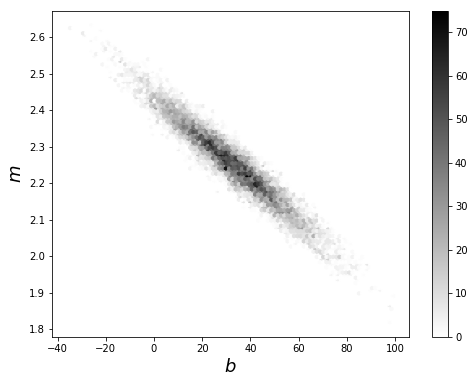

In [40]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.hexbin(sampler.flatchain[:, 0], sampler.flatchain[:, 1], cmap = 'gray_r')
plt.colorbar()
plt.xlabel(r'$b$', fontsize = 18)
plt.ylabel(r'$m$', fontsize = 18)

By eye, we see that the slope and intercept should be $m \approx 2.3$ and $b \approx 30$, respectively

We can also use the quantiles of the distribution to express the slope $m$ as an uncertainty. We write a function that will take a set of values and return an estimate of the median value of $m$ as the centre of the distribution and the positive and negative on-sided errors

In [41]:
def confidence_interval_68(x):
    return np.percentile(x, [16, 50, 84])

interceptInfo = confidence_interval_68(sampler.flatchain[:, 0])
slopeInfo = confidence_interval_68(sampler.flatchain[:, 1])

print("[lower, intercept, upper] = ", [interceptInfo[1] - interceptInfo[0], interceptInfo[1], interceptInfo[2] - interceptInfo[1]])
print("[lower, slope, upper] = ", [slopeInfo[1] - slopeInfo[0], slopeInfo[1], slopeInfo[2] - slopeInfo[1]])

[lower, intercept, upper] =  [18.997584812063945, 32.405861634071464, 18.33217941192313]
[lower, slope, upper] =  [0.10619412641541892, 2.254724567589289, 0.10564718843738863]


And the final answer is:

Intercept: $b = 32_{-18}^{+19}$

Slope: $m = 2.25 \pm 0.11$

Which is basically the same result that we obtained using the least-squares method

3b)

Now we repeat exactly the same as in 3a), but using the complete Table 1 in Hogg, Bovy, & Lang (2010). I will skip some steps to make it briefer

In [42]:
def logProbFunc(p, x, y, yerr): # returns the (natural) logarithmic probability.
    p = np.array(p); x = np.array(x); y = np.array(y); yerr = np.array(yerr); # can't do ** operation on lists.
    b, m = p[0], p[1] # unpack from parameter vector.
    logProb = - 0.5 * np.nansum(np.log(2 * np.pi * yerr**2)) - np.nansum((y - m * x - b)**2 / (2 * yerr**2))
    return logProb

Best slope for b = 213.27: 1.07


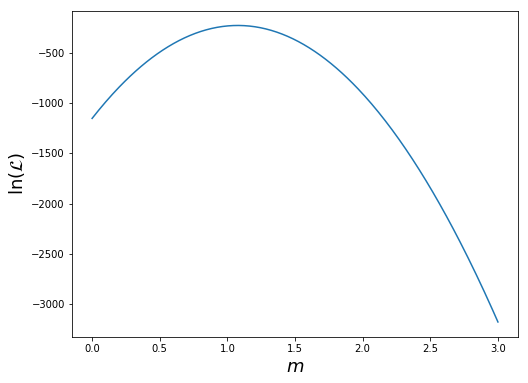

In [43]:
# Plot the sample of the logarithmic probability space at zero intercept but varying slopes.
# We take into account the intercept b from above.

logProbSample = np.array([logProbFunc([interceptb, trialm], xb, yb, sigmayb) for trialm in np.linspace(0, 3, 300)])
m_plot = np.linspace(0, 3, 300)

f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.plot(m_plot, logProbSample)
plt.xlabel(r'$m$', fontsize = 18)
plt.ylabel(r'$\ln(\mathcal{L})$', fontsize = 18)

# Print result.
print('Best slope for b = {1:4.2f}: {0:4.2f}'.format(m_plot[np.argmax(logProbSample)], interceptb))

We now sample our logarithmic probability distribution with emcee. The code below has been taken from "02_OLS via MCMC.ipynb" and it represents a typical call signature to emcee.

In [44]:
ndim, nwalkers = 2, 10
# We want one dimension parameter.
# nwalkers is the number of independent samplers.
# Each walker's steps are called a chain.
p0 = np.zeros((nwalkers, ndim))    # sampler initial condition.
p0[:, 0] = np.random.randn(nwalkers)*500
p0[:, 1] = (np.random.randn(nwalkers))*10

# Initialize a sampler object.
sampler = emcee.EnsembleSampler(nwalkers, ndim, logProbFunc, args = [xb, yb, sigmayb])
# Walk through MCMC for 500 step 'burn-in' (optimization).
[pos, prob, state] = sampler.run_mcmc(p0, 500)

In [45]:
# We look at all the walker chains and variables at once (just for fun).
def plot_chains(sampler, ndim, labels):
    [fig, axes] = plt.subplots(ndim, figsize = (10, 7), sharex = True)
    samples = sampler.chain
    num_steps = samples[0, :, 0].size
    
    for i in range(ndim):
        ax = axes[i]
        median_var = np.median(samples[:, :, i])
        
        for j in range(nwalkers):
            ax.plot(samples[j, :, i] - median_var, "k", alpha = 0.3)
            
        ax.set_xlim(0, num_steps)
        ax.set_ylabel("{0}-{1:4.2e}".format(labels[i], median_var))
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_yscale('symlog',
                     linthreshy = np.percentile(np.abs(samples[:, :, i]), 25))
    axes[-1].set_xlabel("step number")
    
    [fig, axes] = plt.subplots(ndim, figsize = (10, 7))
    
    for i in range(ndim):
        ax = axes[i]
        ax.hist(sampler.flatchain[:, i], bins = 100)
        ax.set_xlabel("Distribution of {0}".format(labels[i]))

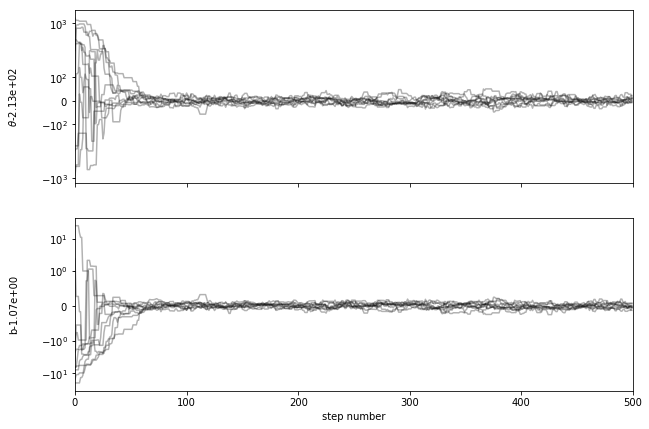

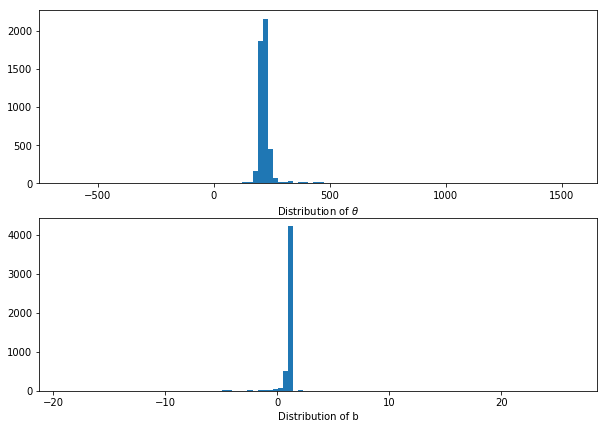

In [46]:
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

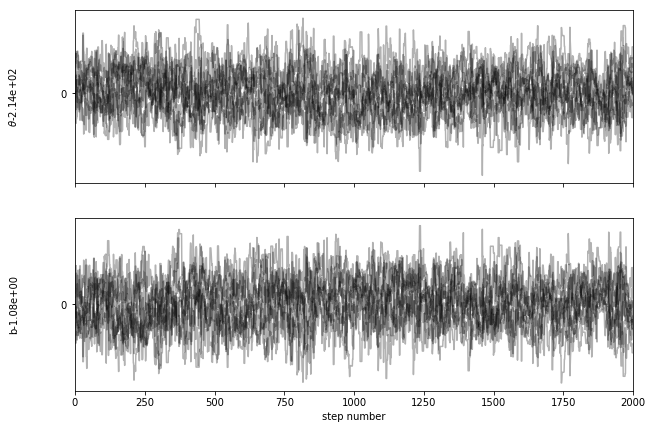

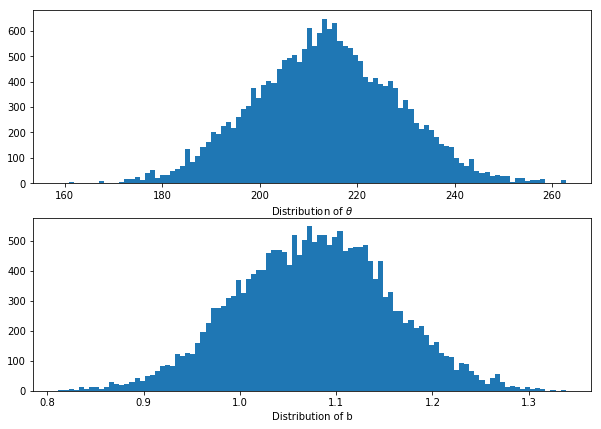

In [47]:
# This line restarts the MCMC process after burn-in leaving only the part we care about.
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 2000)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

Text(0,0.5,'$m$')

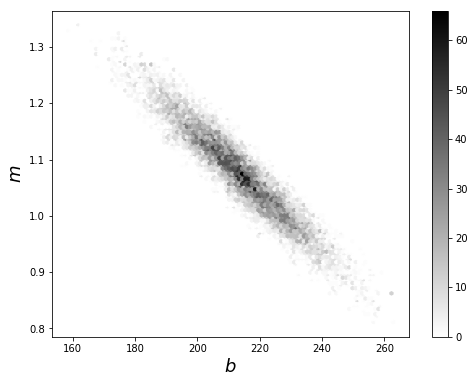

In [48]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.hexbin(sampler.flatchain[:, 0], sampler.flatchain[:, 1], cmap = 'gray_r')
plt.colorbar()
plt.xlabel(r'$b$', fontsize = 18)
plt.ylabel(r'$m$', fontsize = 18)

By eye, we see that the slope and intercept should be $m \approx 1.05$ and $b \approx 210$, respectively

We can, finally, use quantiles of the distribution to express the slope $m$ as an uncertainty. We write a function that will take a set of values and return an estimate of the median value of $m$ as the centre of the distribution and the positive and negative on-sided errors

In [49]:
def confidence_interval_68(x):
    return np.percentile(x, [16, 50, 84])

interceptInfo = confidence_interval_68(sampler.flatchain[:, 0])
slopeInfo = confidence_interval_68(sampler.flatchain[:, 1])

print("[lower, intercept, upper] = ", [interceptInfo[1] - interceptInfo[0], interceptInfo[1], interceptInfo[2] - interceptInfo[1]])
print("[lower, slope, upper] = ", [slopeInfo[1] - slopeInfo[0], slopeInfo[1], slopeInfo[2] - slopeInfo[1]])

[lower, intercept, upper] =  [14.669061854446085, 213.510892474361, 14.779191296348841]
[lower, slope, upper] =  [0.08154057749206223, 1.0774151436181059, 0.07726895467934147]


And the final answer is:

Intercept: $b = 213_{-13}^{+14}$

Slope: $m = 1.07 \pm 0.07$

Which is basically the same result that we obtained using the least-squares method, but with smaller uncertainties

4. Fitting a line - 2-D errors and MCMC

The following code/solution is based on "03_2D Errors.ipynb", provided in class

4a)

In [50]:
# Bring the relevant data (Table 1 in Hogg, Bovy, & Lang (2010), excluding IDs 2-4).
xa = [201, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146];
ya = [592, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344];
sigmaya = [61, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22];
sigmaxa = [9, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5];
rhoxya = [-0.84, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56];

According to Hogg et al. (article provided), the standard formulation $y = mx + b$ for a line is ill-suited to the case where both $x$ and $y$ are unknowns and we are trying to find a relationship between them. The cause of this problem is that the parameter $m$ has a lot of parameter space near the y axis. We therefore, for this part of the assignment, look at an alternative model in which we parametrize the slope in terms of the angle that the line makes with the x axis

$$\tan(\theta) = \frac{y}{x} = m$$

We then find the probability is defined by the (perpendicular) distance, as defined from a point to a line, to the (fit) line:


$$\ln(\mathcal{L}) = K - \sum_{i = 0}^{N}{\frac{[(y - b) \cos(\theta) - x \sin(\theta)]^2}{\sigma_{x}^2 \sin^2(\theta)^2 + \sigma_{y}^2 \cos^2(\theta) - 2 \sin(\theta) \cos(\theta) \rho_{xy} \sigma_{x} \sigma_{y}}} (**)$$

In [51]:
# Define this equation above (**).
def logProbFunc2D(p, x , y, x_err, y_err, xy_err):
    p = np.array(p); x = np.array(x); y = np.array(y);
    x_err = np.array(x_err); y_err = np.array(y_err); xy_err = np.array(xy_err);
    
    [theta, yoff] = p[0], p[1]    # yoff is just b, the intercept, in the equation above.
    
    #if theta < - np.pi/2 or theta > np.pi/2:
        #return -np.inf
    
    #else:
    Delta = (np.cos(theta) * (y - yoff) - np.sin(theta) * x)**2
    Sigma = (np.sin(theta)**2 * x_err**2 + np.cos(theta)**2 * y_err**2
             - 2 * np.sin(theta) * np.cos(theta) * xy_err)
    logProb = - np.sum(Delta / Sigma)
    
    return logProb

We show the deviations from the median of each parameter as a function of step:

In [52]:
def plot_chains(sampler, ndim, labels):
    # We look at all the chains at once.
    [fig, axes] = plt.subplots(ndim, figsize = (10, 7), sharex = True)
    samples = sampler.chain
    num_steps = samples[0, :, 0].size
    
    for i in range(ndim):
        ax = axes[i]
        median_var = np.median(samples[:, :, i])
    
        for j in range(nwalkers):
            ax.plot(samples[j, :, i] - median_var, "k", alpha = 0.3)
    
        ax.set_xlim(0, num_steps)
        ax.set_ylabel("{0}-{1:4.2e}".format(labels[i],median_var))
        ax.yaxis.set_label_coords(-0.1, 0.5)
        ax.set_yscale('symlog', 
                      linthreshy=np.percentile(np.abs(samples[:, :, i]), 25))
    
    axes[-1].set_xlabel("step number")

    [fig, axes] = plt.subplots(ndim, figsize=(10, 7))
    
    for i in range(ndim):
        ax = axes[i]    
        ax.hist(sampler.flatchain[:, i], bins = 100)
        ax.set_xlabel(labels[i])

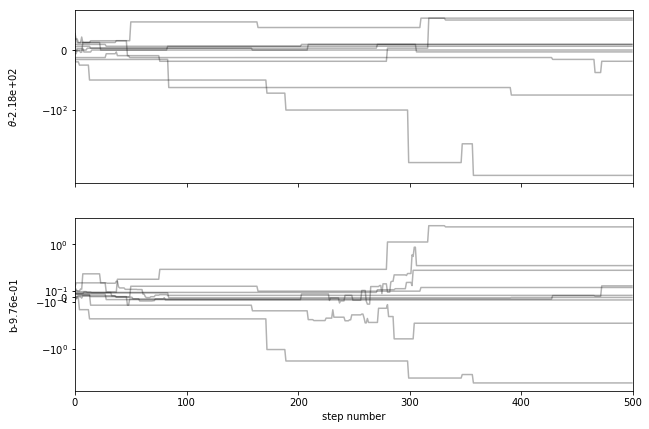

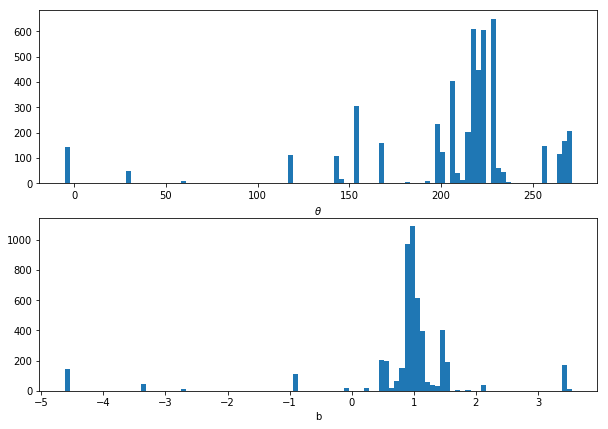

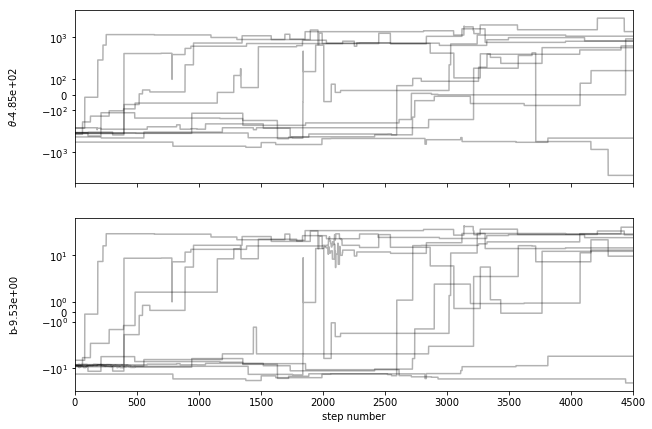

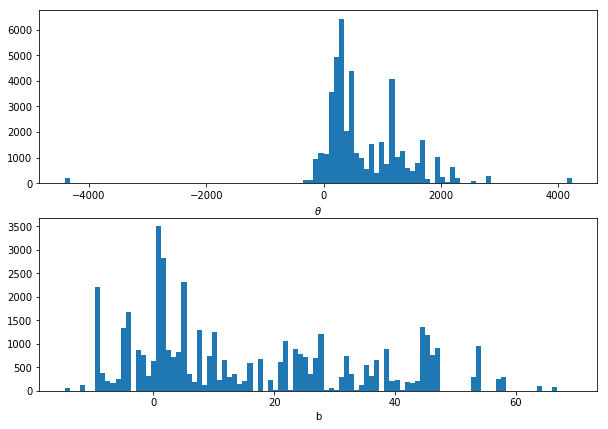

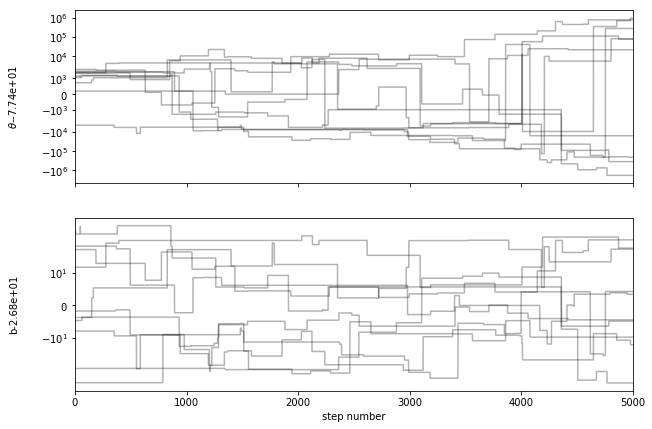

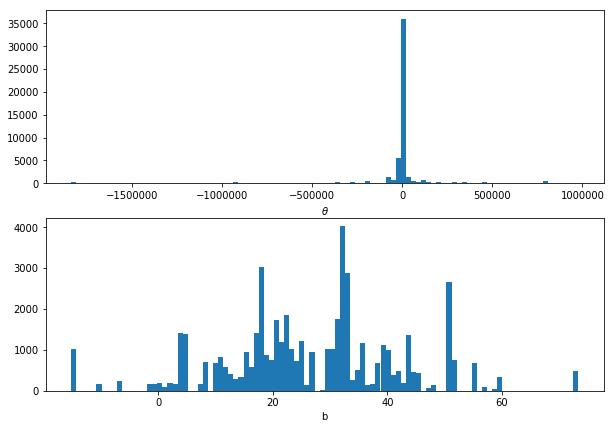

In [53]:
[ndim, nwalkers] = [2, 10]
p0 = np.zeros((nwalkers, ndim))
p0[:, 0] = np.random.randn(nwalkers)*np.pi/4 + np.pi/4
p0[:, 0] = p0[:, 0] % np.pi/2
p0[:, 1] = (np.random.randn(nwalkers)) * 30
sampler = emcee.EnsembleSampler(nwalkers, ndim, logProbFunc2D, 
                                args = [xa, ya, sigmaxa, sigmaya, np.multiply(rhoxya, np.multiply(sigmaxa, sigmaya))])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 500)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 4500)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 5000)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

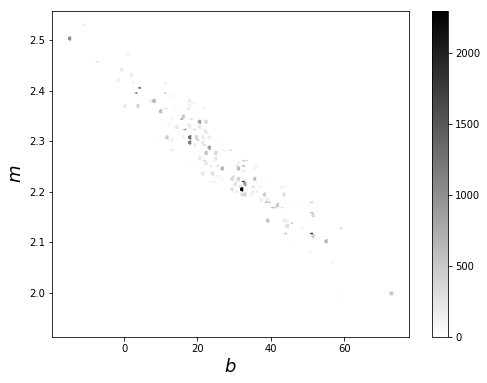

In [54]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.hexbin(sampler.flatchain[:, 1], np.tan(sampler.flatchain[:, 0]), cmap = 'gray_r')
plt.colorbar()
plt.xlabel(r'$b$', fontsize = 18)
plt.ylabel(r'$m$', fontsize = 18)
plt.show()

In [55]:
def confidenceInterval68(x):
    return np.percentile(x, [16, 50, 84])

mresults = confidenceInterval68(np.tan(sampler.flatchain[:, 0]))
bresults = confidenceInterval68(sampler.flatchain[:, 1])

print('m: [lower, center, upper] =', mresults)
print()
print('b: [lower, center, upper] =', bresults)

m: [lower, center, upper] = [2.16960565 2.25219383 2.35877138]

b: [lower, center, upper] = [12.05168494 26.84478053 42.22874814]


And we extract the uncertainties:

In [56]:
print('m: lower unc, upper unc =', mresults[1] - mresults[0], mresults[2] - mresults[1])
print()
print('b: lower unc, upper unc =', bresults[1] - bresults[0], bresults[2] - bresults[1])

m: lower unc, upper unc = 0.08258817407622532 0.10657755303406491

b: lower unc, upper unc = 14.793095584552994 15.383967615019834


Our best fit parameters are:

$m = 2.25_{-0.08}^{+0.11}$,

$b = 26.8_{-14.8}^{+15.4}$,

and our uncertainties have been further reduced compared to the two methods used above, namely, the least-squares and MCMC

Now we make the plot with error ellipses

In [57]:
from matplotlib.patches import Ellipse

C = np.array([[np.power(sigmaxa, 2), np.multiply(rhoxya, np.multiply(sigmaxa, sigmaya))], [np.multiply(rhoxya, np.multiply(sigmaxa, sigmaya)), np.power(sigmaya, 2)]])
sigmaMajor = np.zeros(len(sigmaxa))
sigmaMinor = np.zeros(len(sigmaxa))
Angle = np.zeros(len(sigmaxa))

for i in range(len(sigmaxa)):
    [evals, evecs] = np.linalg.eig(C[:, :, i])
    sigmaMajor[i] = np.sqrt(evals.max())
    sigmaMinor[i] = np.sqrt(evals.min())
    Angle[i] = 0.5 * np.arctan(sigmaMajor[i] / sigmaMinor[i] * (2 * C[0, 1, i] / (C[1, 1, i] - C[0, 0, i]))) * 180/np.pi

def ErrorEllipse_plot(x, y, sigmaMajor, sigmaMinor, Angle):
  ErrorEllipse = [Ellipse( xy = (xa[i],ya[i]), width = sigmaMajor[i], height = sigmaMinor[i], angle = Angle[i]) for i in range(len(xa))]
  fig = plt.figure(figsize = (8, 8))
  ax = fig.add_subplot(111)
  ax.scatter(xa, ya, color = 'black')
  ax.set_ylim([0, 700])
  for ells in ErrorEllipse:
    ax.add_artist(ells)
    ells.set_clip_box(ax.bbox)
    ells.set_alpha(0.3)
    ells.set_facecolor('blue')  

<Figure size 576x432 with 0 Axes>

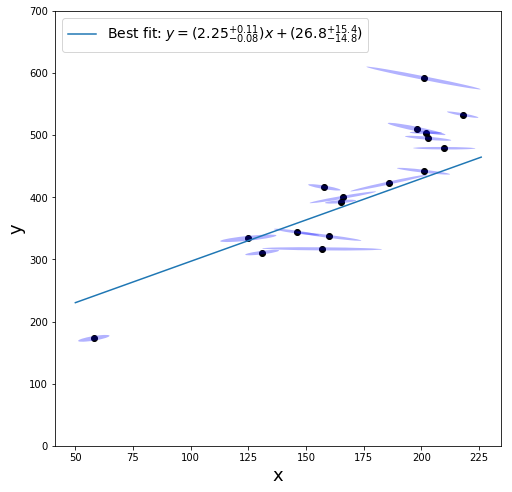

In [66]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
ErrorEllipse_plot(xa, ya, sigmaMajor, sigmaMinor, Angle)
xlimits = np.array(plt.xlim())
testx = np.linspace(xlimits.min(), xlimits.max(), 30)
plt.plot(testx, bresults[1] + mresults[1] * testx , label = 'Best fit: ' + r'$y = (2.25_{-0.08}^{+0.11})x + (26.8_{-14.8}^{+15.4})$');
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14, loc = 'upper left')

4b)

We do the same as in part a), but the relevant data is now the complete Table 1 in Hogg, Bovy, & Lang (2010)

In [59]:
xb = xb; yb = yb; sigmayb = sigmayb;
sigmaxb = [9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5];
rhoxyb = [-0.84, 0.31,  0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.50, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56];

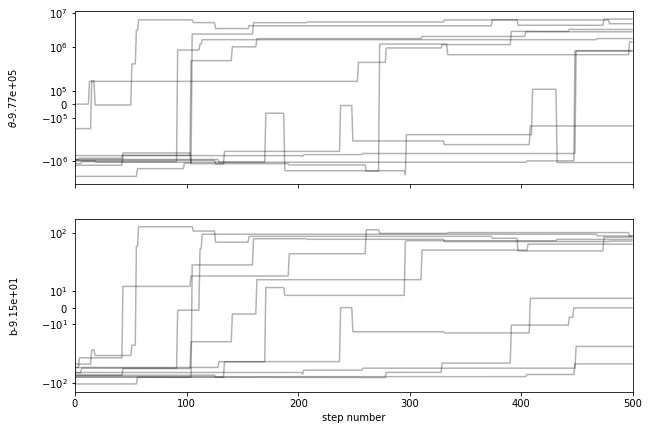

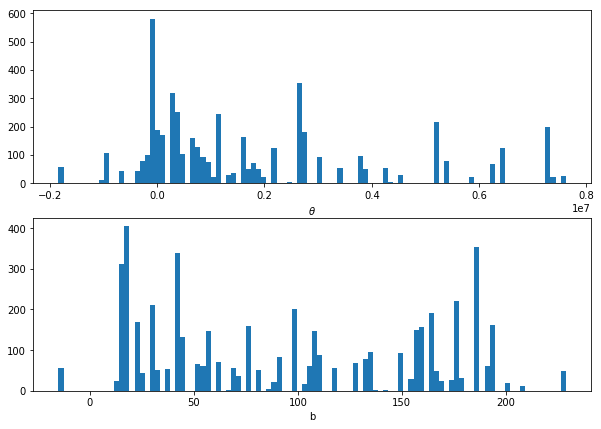

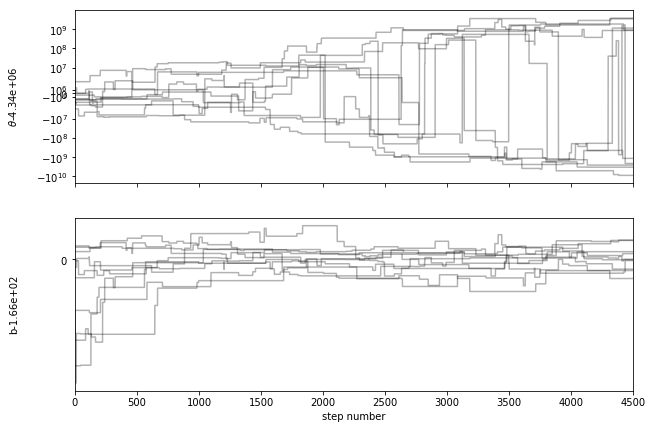

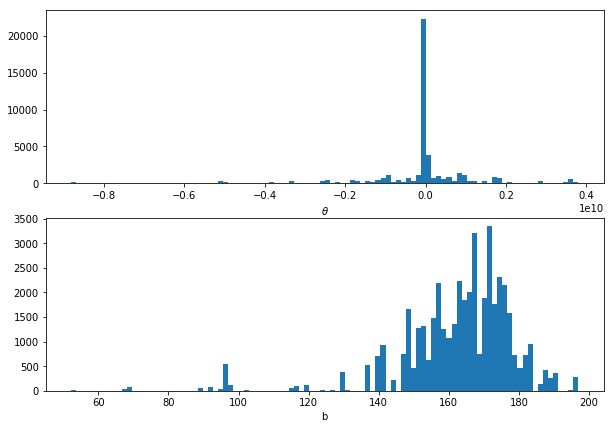

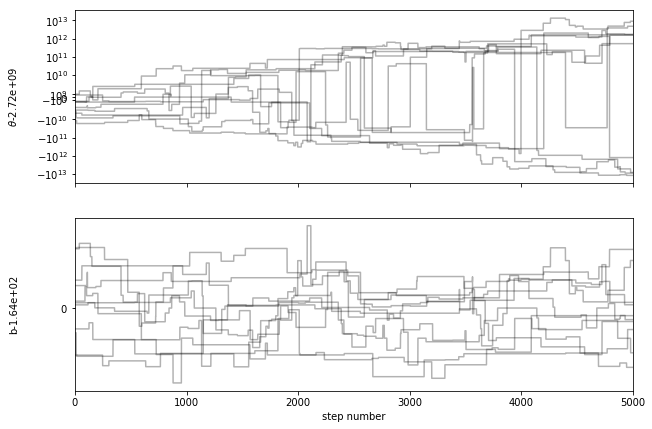

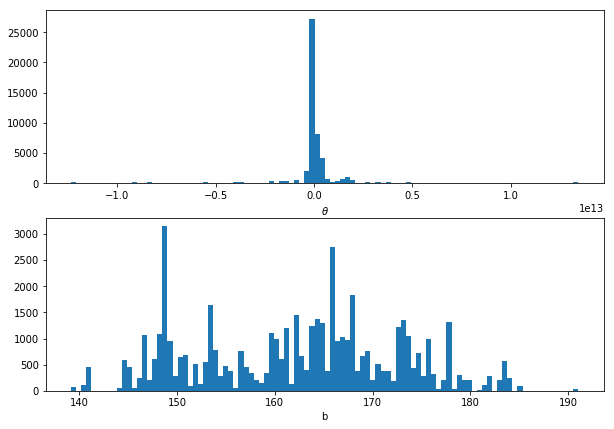

In [60]:
# Actualize the chain plots.

[ndim, nwalkers] = [2, 10]
p0 = np.zeros((nwalkers, ndim))
p0[:, 0] = np.random.randn(nwalkers)*np.pi/4 + np.pi/4
p0[:, 0] = p0[:, 0] % np.pi/2
p0[:, 1] = (np.random.randn(nwalkers)) * 30
sampler = emcee.EnsembleSampler(nwalkers, ndim, logProbFunc2D, 
                                args = [xb, yb, sigmaxb, sigmayb, np.multiply(rhoxyb, np.multiply(sigmaxb, sigmayb))])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 500)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 4500)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])
sampler.reset()
[pos, prob, state] = sampler.run_mcmc(pos, 5000)
plot_chains(sampler, ndim, labels = [r'$\theta$', "b"])

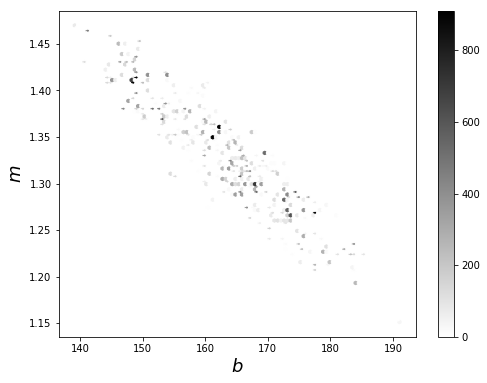

In [61]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
plt.hexbin(sampler.flatchain[:, 1], np.tan(sampler.flatchain[:, 0]), cmap = 'gray_r')
plt.colorbar()
plt.xlabel(r'$b$', fontsize = 18)
plt.ylabel(r'$m$', fontsize = 18)
plt.show()

In [62]:
# Extract the best fit parameters.
mresults = confidenceInterval68(np.tan(sampler.flatchain[:, 0]))
bresults = confidenceInterval68(sampler.flatchain[:, 1])

print('m: [lower, center, upper] =', mresults)
print()
print('b: [lower, center, upper] =', bresults)

m: [lower, center, upper] = [1.27147869 1.33074398 1.40933847]

b: [lower, center, upper] = [148.91285204 163.87035565 173.12495587]


And we extract the uncertainties:

In [63]:
print('m: lower unc, upper unc =', mresults[1] - mresults[0], mresults[2] - mresults[1])
print()
print('b: lower unc, upper unc =', bresults[1] - bresults[0], bresults[2] - bresults[1])

m: lower unc, upper unc = 0.059265294624549325 0.07859448630065136

b: lower unc, upper unc = 14.957503608223988 9.254600220942194


Our best fit parameters are:

$m = 1.33_{-0.06}^{+0.08}$,

$b = 164_{-15}^{+9}$,

and the observations are the same: our uncertainties have been further reduced compared to the two methods used above, namely, the least-squares and MCMC

Now we make the plot with error ellipses

In [64]:
C = np.array([[np.power(sigmaxa, 2), np.multiply(rhoxya, np.multiply(sigmaxa, sigmaya))], [np.multiply(rhoxya, np.multiply(sigmaxa, sigmaya)), np.power(sigmaya, 2)]])
sigmaMajor = np.zeros(len(sigmaxa))
sigmaMinor = np.zeros(len(sigmaxa))
Angle = np.zeros(len(sigmaxa))

for i in range(len(sigmaxa)):
    [evals, evecs] = np.linalg.eig(C[:, :, i])
    sigmaMajor[i] = np.sqrt(evals.max())
    sigmaMinor[i] = np.sqrt(evals.min())
    Angle[i] = 0.5 * np.arctan(sigmaMajor[i] / sigmaMinor[i] * (2 * C[0, 1, i] / (C[1, 1, i] - C[0, 0, i]))) * 180/np.pi


<Figure size 576x432 with 0 Axes>

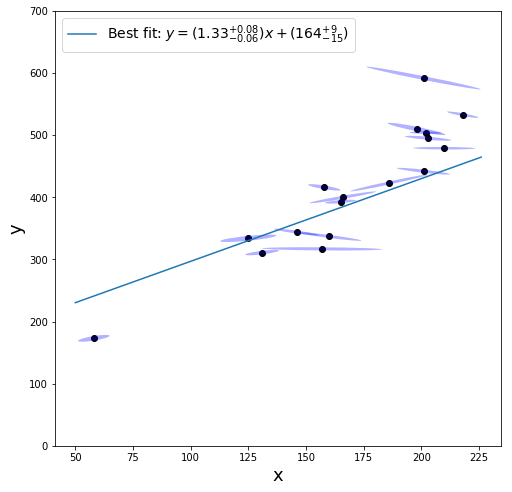

In [69]:
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(6) 
ErrorEllipse_plot(xa, ya, sigmaMajor, sigmaMinor, Angle)
xlimits = np.array(plt.xlim())
testx = np.linspace(xlimits.min(), xlimits.max(), 30)
plt.plot(testx, bresults[1] + mresults[1] * testx , label = 'Best fit: ' + r'$y = (1.33_{-0.06}^{+0.08})x + (164_{-15}^{+9})$');
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14, loc = 'upper left')